In [1]:
import numpy as np
import pandas as pd

from bokeh.charts import Histogram, Bar, BoxPlot
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, output_file

In [2]:
repairs_2014 = pd.read_csv('data/historical-repairs-2014-merge.csv',
                           encoding="utf-8", index_col=False, parse_dates=['logged-date'])

repairs_2015 = pd.read_csv('data/historical-repairs-2015-merge.csv',
                           encoding="utf-8", index_col=False, parse_dates=['logged-date'])

repairs_2016 = pd.read_csv('data/historical-repairs-2016-mini.csv',
                           encoding="utf-8", index_col=False, parse_dates=['logged-date'])

In [3]:
def occurences_of_repairs_per_year(df, year):
    tmp_repairs = df.drop(['logged-date', 'repair-number', 'description-for-code'], axis=1)
    tmp_repairs['number of repairs'] = pd.Series([1] * len(tmp_repairs))
    counts_repairs = tmp_repairs.groupby(['property-reference'], as_index=False).sum()
    counts_repairs.to_csv('data/counts-repairs-{0}.csv'.format(year), index=False)
    tmp_repairs_2 = counts_repairs.drop(['property-reference'], axis=1)
    tmp_repairs_2['number of properties'] = pd.Series([1] * len(tmp_repairs_2))
    properties_repairs = tmp_repairs_2.groupby(['number of repairs'], as_index=False).sum()
    return properties_repairs

In [4]:
print len(repairs_2014), len(repairs_2015), len(repairs_2016)

46798 64858 20094


In [19]:
#repairs_2014.head(3)

In [20]:
#repairs_2015.head(3)

In [21]:
#repairs_2016.head(3)

In [4]:
properties_repairs_2014 = occurences_of_repairs_per_year(repairs_2014, 2014)

properties_repairs_2015 = occurences_of_repairs_per_year(repairs_2015, 2015)

properties_repairs_2016 = occurences_of_repairs_per_year(repairs_2016, 2016)

In [6]:
nb_repairs_2014 = properties_repairs_2014.rename(columns={'number of properties': 'number of properties for 2014'})
nb_repairs_2015 = properties_repairs_2015.rename(columns={'number of properties': 'number of properties for 2015'})
nb_repairs_2016 = properties_repairs_2016.rename(columns={'number of properties': 'number of properties for 2016'})

repairs_for_plot = pd.merge(nb_repairs_2014, nb_repairs_2015, how='outer', 
                                left_on='number of repairs', right_on='number of repairs')

all_repairs_for_plot = pd.merge(repairs_for_plot, nb_repairs_2016, how='outer', 
                                left_on='number of repairs', right_on='number of repairs')

all_repairs_for_plot.head()

,number of repairs,number of properties for 2014,number of properties for 2015,number of properties for 2016
0,1,3828,7750,4498
1,2,2866,4745,2291
2,3,2051,3082,1157
3,4,1470,2059,655
4,5,968,1257,368


In [30]:
all_repairs_for_plot.describe()

,number of repairs,number of properties for 2014,number of properties for 2015,number of properties for 2016
count,44.000000,38.000000,39.000000,19.000000
mean,24.227273,355.210526,555.871795,493.842105
std,16.014330,842.800805,1515.041569,1125.408433
min,1.000000,1.000000,1.000000,1.000000
25%,11.750000,2.000000,1.000000,2.500000
50%,22.500000,10.000000,9.000000,19.000000
75%,34.250000,136.000000,154.500000,277.500000
max,68.000000,3828.000000,7750.000000,4498.000000


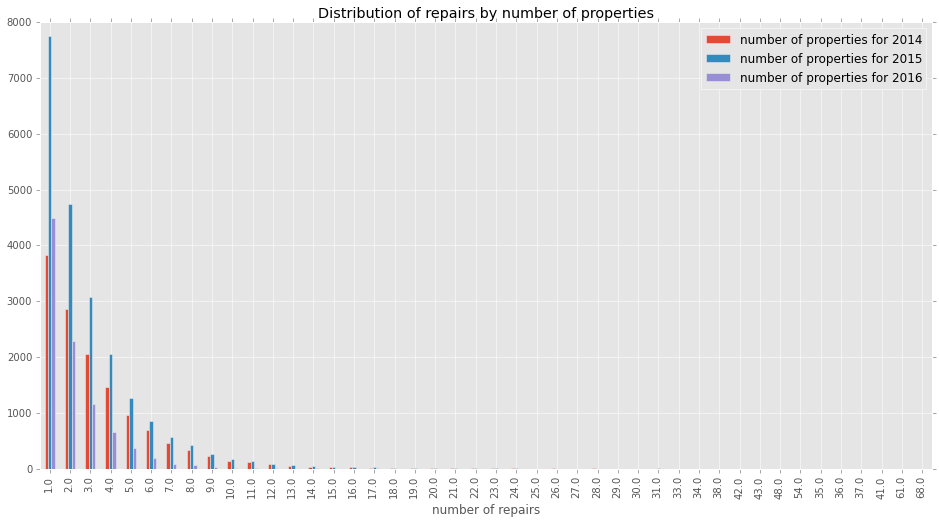

In [29]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

all_repairs_for_plot.plot(kind='bar', x='number of repairs', figsize=(16, 8),
                          title='Distribution of repairs by number of properties')

In [16]:
repairs_occurences_2014_plot = Bar(properties_repairs_2014, label='number of repairs',
                                   values='number of properties', 
                                   title='Occurences of repairs by property in 2014', plot_width=900,
                                   ylabel='Number of properties', xlabel='Number of repairs')

output_notebook()
#output_file("data/plots/occurences-of-repairs-2014.html")
show(repairs_occurences_2014_plot)

Loading BokehJS ...

In [16]:
properties_repairs_2015.describe()

,number of repairs,number of properties
count,39.000000,39.000000
mean,21.794872,555.871795
std,15.169532,1515.041569
min,1.000000,1.000000
25%,10.500000,1.000000
50%,20.000000,9.000000
75%,29.500000,154.500000
max,68.000000,7750.000000


In [17]:
repairs_occurences_2015_plot = Bar(properties_repairs_2015, label='number of repairs',
                                   values='number of properties', color='blue',
                                   title='Occurences of repairs by property in 2015', plot_width=900,
                                   ylabel='Number of properties', xlabel='Number of repairs')

output_notebook()
#output_file("data/plots/occurences-of-repairs-2015.html")
show(repairs_occurences_2015_plot)

Loading BokehJS ...

In [15]:
properties_repairs_2016.describe()

,number of repairs,number of properties
count,19.000000,19.000000
mean,10.315789,494.157895
std,6.110579,1126.485551
min,1.000000,1.000000
25%,5.500000,2.500000
50%,10.000000,19.000000
75%,14.500000,277.500000
max,21.000000,4503.000000


In [6]:
repairs_occurences_2016_plot = Bar(properties_repairs_2016, label='number of repairs',
                                   values='number of properties', color='green',
                                   title='Occurences of repairs by property in 2016', plot_width=900,
                                   ylabel='Number of properties', xlabel='Number of repairs')

output_notebook()
#output_file("data/plots/occurences-of-repairs-2016.html")
show(repairs_occurences_2016_plot)

Loading BokehJS ...